## The Data

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [107]:
file = 'Time-Series-Data.xlsx'
sheet = 'Hourly' # change excel sheet
data = pd.read_excel(file, sheet)

timestamp = data.columns[0]
weather_aspect = data.columns[1] # change examining aspect of weather
weather = data.filter(items = [timestamp, weather_aspect])
weather.head()

,Time,Temperature
0,2019-06-24 00:00:00,29.87
1,2019-06-24 01:00:00,29.95
2,2019-06-24 02:00:00,29.78
3,2019-06-24 03:00:00,29.26
4,2019-06-24 04:00:00,28.85


## Indexing with Time Series Data

In [108]:
weather = weather.set_index(timestamp)
weather.index

DatetimeIndex(['2019-06-24 00:00:00', '2019-06-24 01:00:00',
               '2019-06-24 02:00:00', '2019-06-24 03:00:00',
               '2019-06-24 04:00:00', '2019-06-24 05:00:00',
               '2019-06-24 06:00:00', '2019-06-24 07:00:00',
               '2019-06-24 08:00:00', '2019-06-24 09:00:00',
               ...
               '2019-07-09 14:00:00', '2019-07-09 15:00:00',
               '2019-07-09 16:00:00', '2019-07-09 17:00:00',
               '2019-07-09 18:00:00', '2019-07-09 19:00:00',
               '2019-07-09 20:00:00', '2019-07-09 21:00:00',
               '2019-07-09 22:00:00', '2019-07-09 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=384, freq=None)

In [109]:
train_start = '2019-06-24' # change the start of train data
resample = '1H' # change the resample rule
y = weather[weather_aspect].resample(resample).mean()
y[train_start:]

Time
2019-06-24 00:00:00    29.87
2019-06-24 01:00:00    29.95
2019-06-24 02:00:00    29.78
2019-06-24 03:00:00    29.26
2019-06-24 04:00:00    28.85
2019-06-24 05:00:00    27.95
2019-06-24 06:00:00    28.35
2019-06-24 07:00:00    29.63
2019-06-24 08:00:00    29.28
2019-06-24 09:00:00    29.63
2019-06-24 10:00:00    30.66
2019-06-24 11:00:00    31.38
2019-06-24 12:00:00    31.68
2019-06-24 13:00:00    31.83
2019-06-24 14:00:00    30.85
2019-06-24 15:00:00    30.52
2019-06-24 16:00:00    30.46
2019-06-24 17:00:00    30.13
2019-06-24 18:00:00    29.46
2019-06-24 19:00:00    30.35
2019-06-24 20:00:00    29.78
2019-06-24 21:00:00    29.38
2019-06-24 22:00:00    28.96
2019-06-24 23:00:00    28.72
2019-06-25 00:00:00    28.37
2019-06-25 01:00:00    28.06
2019-06-25 02:00:00    27.78
2019-06-25 03:00:00    27.57
2019-06-25 04:00:00    27.32
2019-06-25 05:00:00    27.27
                       ...  
2019-07-08 18:00:00    34.05
2019-07-08 19:00:00    31.90
2019-07-08 20:00:00    30.89
2019-07-0

## Visualizing Furniture Sales Time Series Data

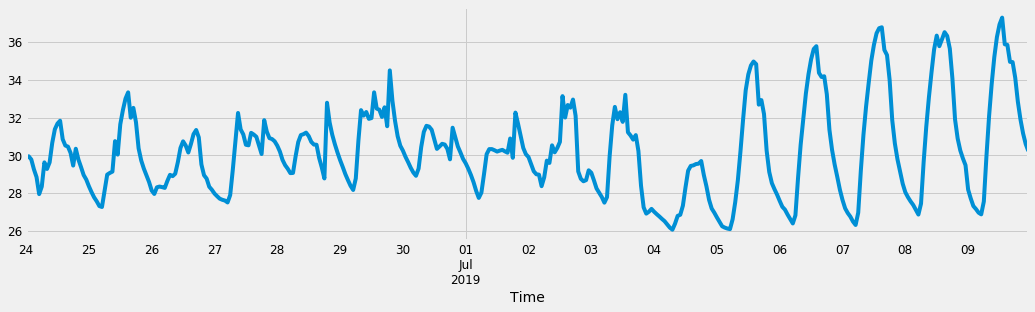

In [110]:
y.plot(figsize=(16, 4))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: 
* trend
* seasonality
* noise.

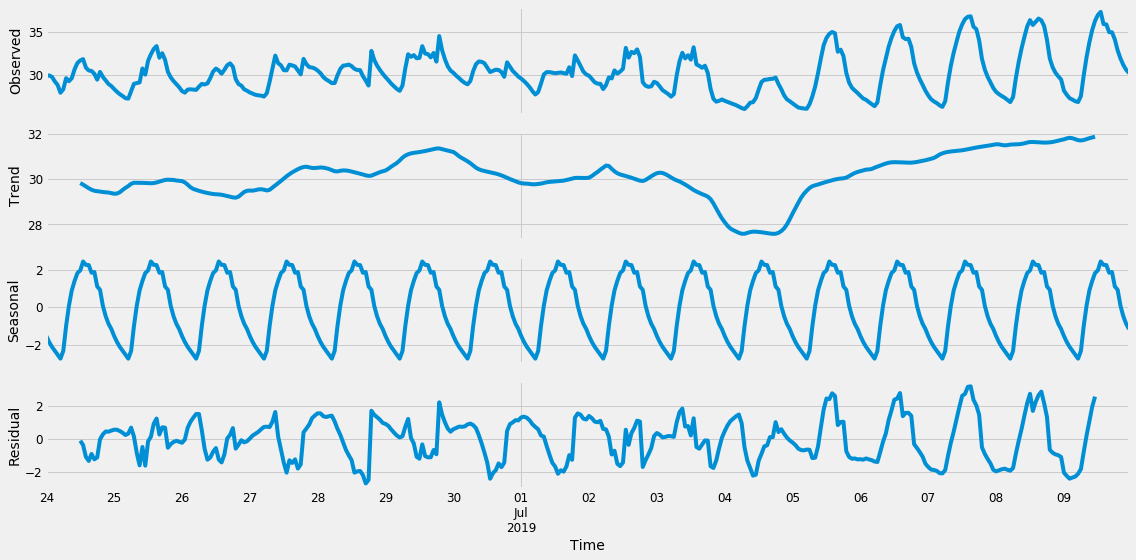

In [111]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Notes:

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [112]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
period = 24 # change seasonal period
seasonal_pdq = [(x[0], x[1], x[2], period) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [113]:
optimal_result = 10**5
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}{} - AIC:{}'.format(param, param_seasonal, period, results.aic))
            
            if results.aic < optimal_result:
              optimal_result = results.aic
              optimal_order = param
              optimal_seasonal_order = param_seasonal
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:3702.736046181694
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:3075.63792808007
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:1336.993593810698
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:1219.652230686168
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:1340.7850235335086
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:1297.4382703081606
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:1225.3592743852469
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:1224.1446120751402
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:3187.9250246614283
ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:2601.7288024020922
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:1044.8229404575345
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:938.2193841472695
ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:1052.6266421268292
ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:1056.4197138065774
ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:948.3032470206751
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:945.2331311814002
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:957.8222182093334
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:800.5060591753968
AR

In [114]:
print('ARIMA{}x{}{} - AIC:{}'.format(optimal_order, optimal_seasonal_order, period, optimal_result))

ARIMA(1, 0, 1)x(0, 1, 1, 24)24 - AIC:654.0765205111666


## Fitting the ARIMA model

In [115]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = optimal_order,
                                seasonal_order = optimal_seasonal_order,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8884      0.029     30.655      0.000       0.832       0.945
ma.L1          0.1063      0.062      1.702      0.089      -0.016       0.229
ma.S.L24      -0.4988      0.030    -16.609      0.000      -0.558      -0.440
sigma2         0.4033      0.013     30.374      0.000       0.377       0.429


We should always run model diagnostics to investigate any unusual behavior.

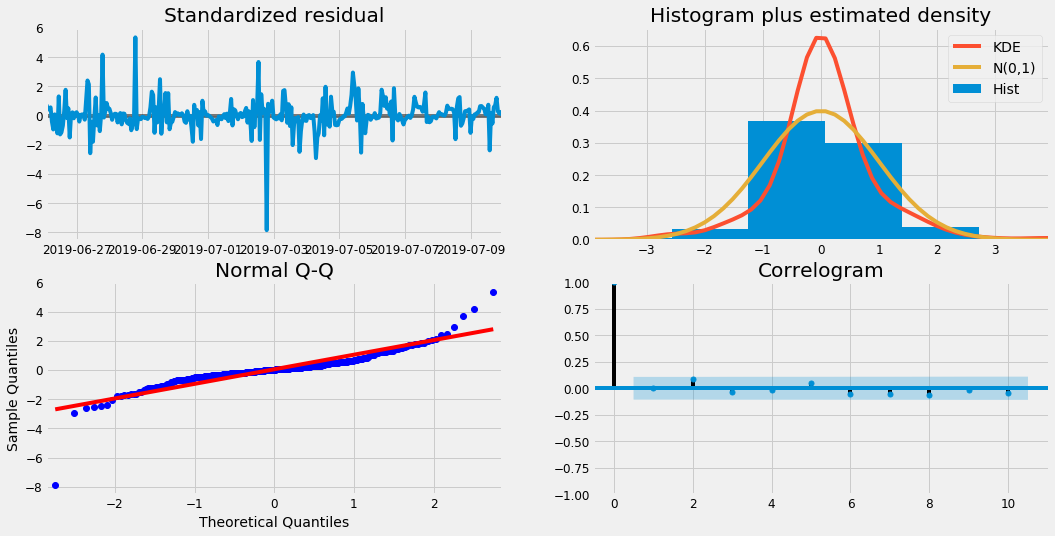

In [116]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Notes:

## Validating forecasts

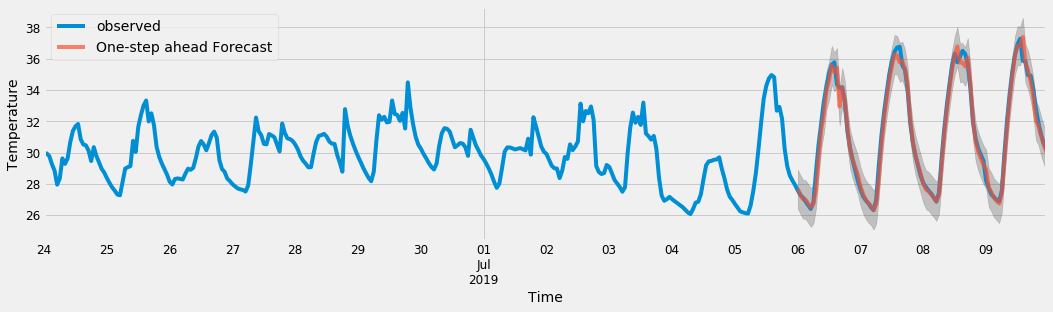

In [117]:
test_start = '2019-07-06' # change the start of test data
pred = results.get_prediction(start=pd.to_datetime(test_start), dynamic=False)
pred_ci = pred.conf_int()

ax = y[train_start:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions.

In [118]:
y_forecasted = pred.predicted_mean
y_truth = y[test_start:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.19


In [119]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.43


## Producing and visualizing forecasts

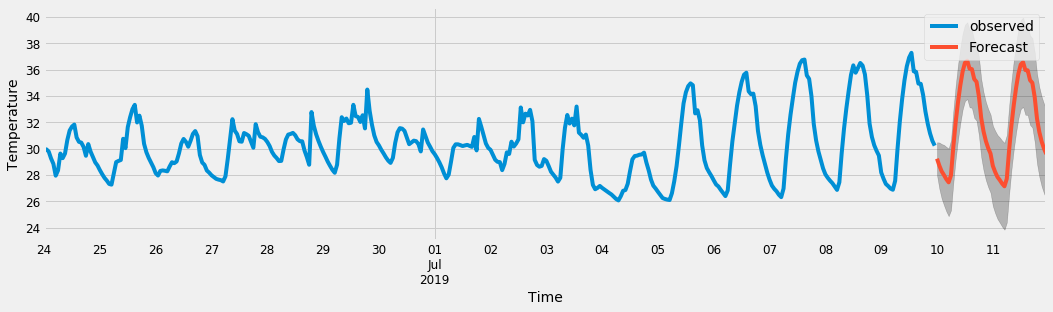

In [120]:
pred_uc = results.get_forecast(steps=48) # change the amount of predicted data
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(16, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)

plt.legend()
plt.show()